In [11]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as math

In [21]:
time_period = 20 # history length for Simple Moving Average for middle band
stdev_factor = 2 # Standard Deviation Scaling factor for the upper and lower_bands
history = [] # price history for computing simple moving average
sma_values = [] # moving average of prices for visualization purposes
upper_band = [] # upper band values
lower_band = [] # lower band values

In [22]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="40d")

In [23]:
for close_price in sbi['Close']:
    history.append(close_price)
    if len(history) > time_period: # we only want to maintain at most 'time_period' number of price observations
        del (history[0])
    sma = stats.mean(history)
    sma_values.append(sma) # simple moving average or middle band
    variance = 0 # variance is the square of standard deviation
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    stdev = math.sqrt(variance / len(history))
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

In [24]:
print(len(upper_band))

40


In [25]:
sbi['upper_band'] = pd.Series(upper_band, index = sbi.index)
sbi['lower_band'] = pd.Series(lower_band, index = sbi.index)
sbi['mid_band'] = pd.Series(sma_values, index = sbi.index)

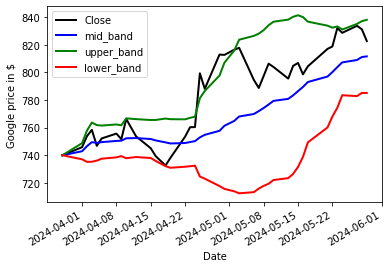

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='sbi price in $')
sbi['Close'].plot(ax=ax1, color='black', lw=2., legend=True)
sbi['mid_band'] .plot(ax=ax1, color='b', lw=2., legend=True)
sbi['upper_band'] .plot(ax=ax1, color='g', lw=2., legend=True)
sbi['lower_band'].plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

For Bollinger bands, when prices stay within the upper and lower bounds, then not much
can be said, but, when prices traverse the upper band, then one interpretation can be that
prices are breaking out to the upside and will continue to do so. Another interpretation of
the same event can be that the trading instrument is overbought and we should expect a
bounce back down.
The other case is when prices traverse the lower band, then one interpretation can be that
prices are breaking out to the downside and will continue to do so. Another interpretation
of the same event can be that the trading instrument is oversold and we should expect a
bounce back up. In